<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/Kaggle%2C%20%EB%8D%B0%EC%9D%B4%EC%BD%98/bike_0719.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd # 판다스 임포트

# 데이터 경로
train = pd.read_csv('/content/train.csv') # 훈련 데이터
test = pd.read_csv('/content/test.csv')   # 테스트 데이터
submission = pd.read_csv('/content/sampleSubmission.csv') # 제출 샘플 데이터

In [ ]:
print(np.__version__)

1.22.4


In [ ]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


datetime - 대여날짜 - 1시간 간격(분, 초가 의미가 없음)

season - 1: 봄, 2: 여름 3: 가을 4: 겨울

hoilday - 공휴일 여부(0 : 비공휴일 1: 공휴일)

workingday - 근무일 여부(0 : 근무일 아님, 1 : 근무일) - 주말과 공휴일이 아니면 근무일

weather 1: 맑음 2: 약간 흐림 3: 약간의 눈/약간의 비/천둥 번개/흐림 4: 악천후(숫자가 클수록 날씨가 안좋음)

temp : 실제온도

atemp : 체감온도

humidity : 상대습도

windspeed : 풍속

casual : 등록되지 않은 사용자 수 - sub target

registered : 등록된 사용자(회원)수 - sub target

count : 자전거 대여 수량 - main target

In [ ]:
# Convert the 'datetime' column to datetime format
train['datetime'] = pd.to_datetime(train['datetime'])
# Create new columns for year, month, day, hour, minute, and second
# 분/초는 모두 0이므로 제외
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek

test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek

In [ ]:
import calendar
from datetime import datetime

# Create a new 'date' column that combines 'year', 'month', and 'day'
train['date'] = pd.to_datetime(train[['year', 'month', 'day']])
# Create a new 'weekday' column
train['weekday'] = train['date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])
# Drop the 'date' column as it's no longer needed
train = train.drop('date', axis=1)

test['date'] = pd.to_datetime(test[['year', 'month', 'day']])
test['weekday'] = test['date'].dt.dayofweek.apply(lambda x: calendar.day_name[x])
test = test.drop('date', axis=1)

# Check the first few rows of the dataframe to confirm the changes
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5,Saturday


In [ ]:
# Drop the 'datetime' column
train = train.drop('datetime', axis=1)
test = test.drop('datetime', axis=1)

## 시각화

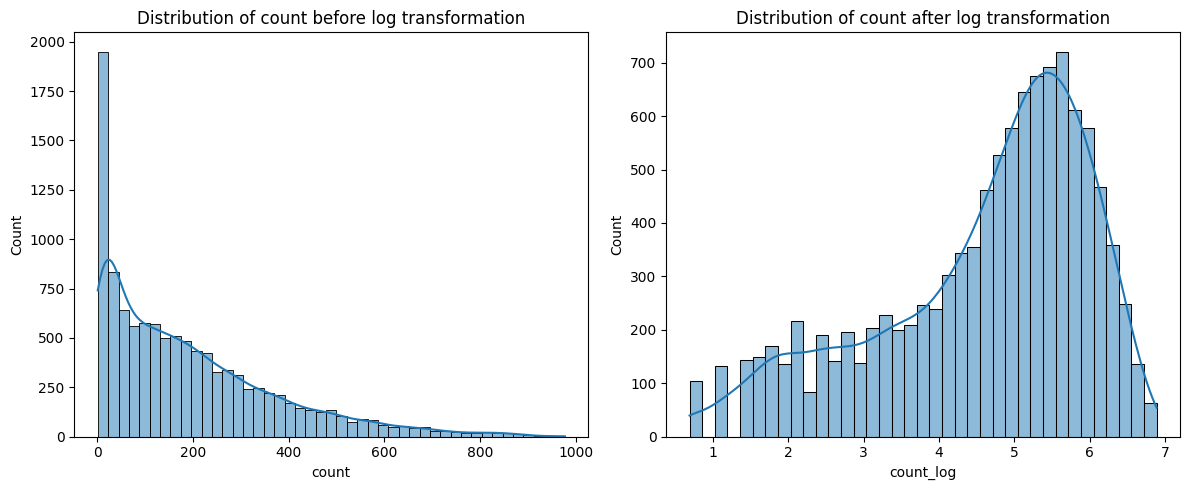

In [ ]:
# Plot the distribution of 'count' before the transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train['count'], kde=True)
plt.title('Distribution of count before log transformation')

# Apply the log transformation
train['count_log'] = np.log1p(train['count'])

# Plot the distribution of 'count' after the transformation
plt.subplot(1, 2, 2)
sns.histplot(train['count_log'], kde=True)
plt.title('Distribution of count after log transformation')

plt.tight_layout()
plt.show()

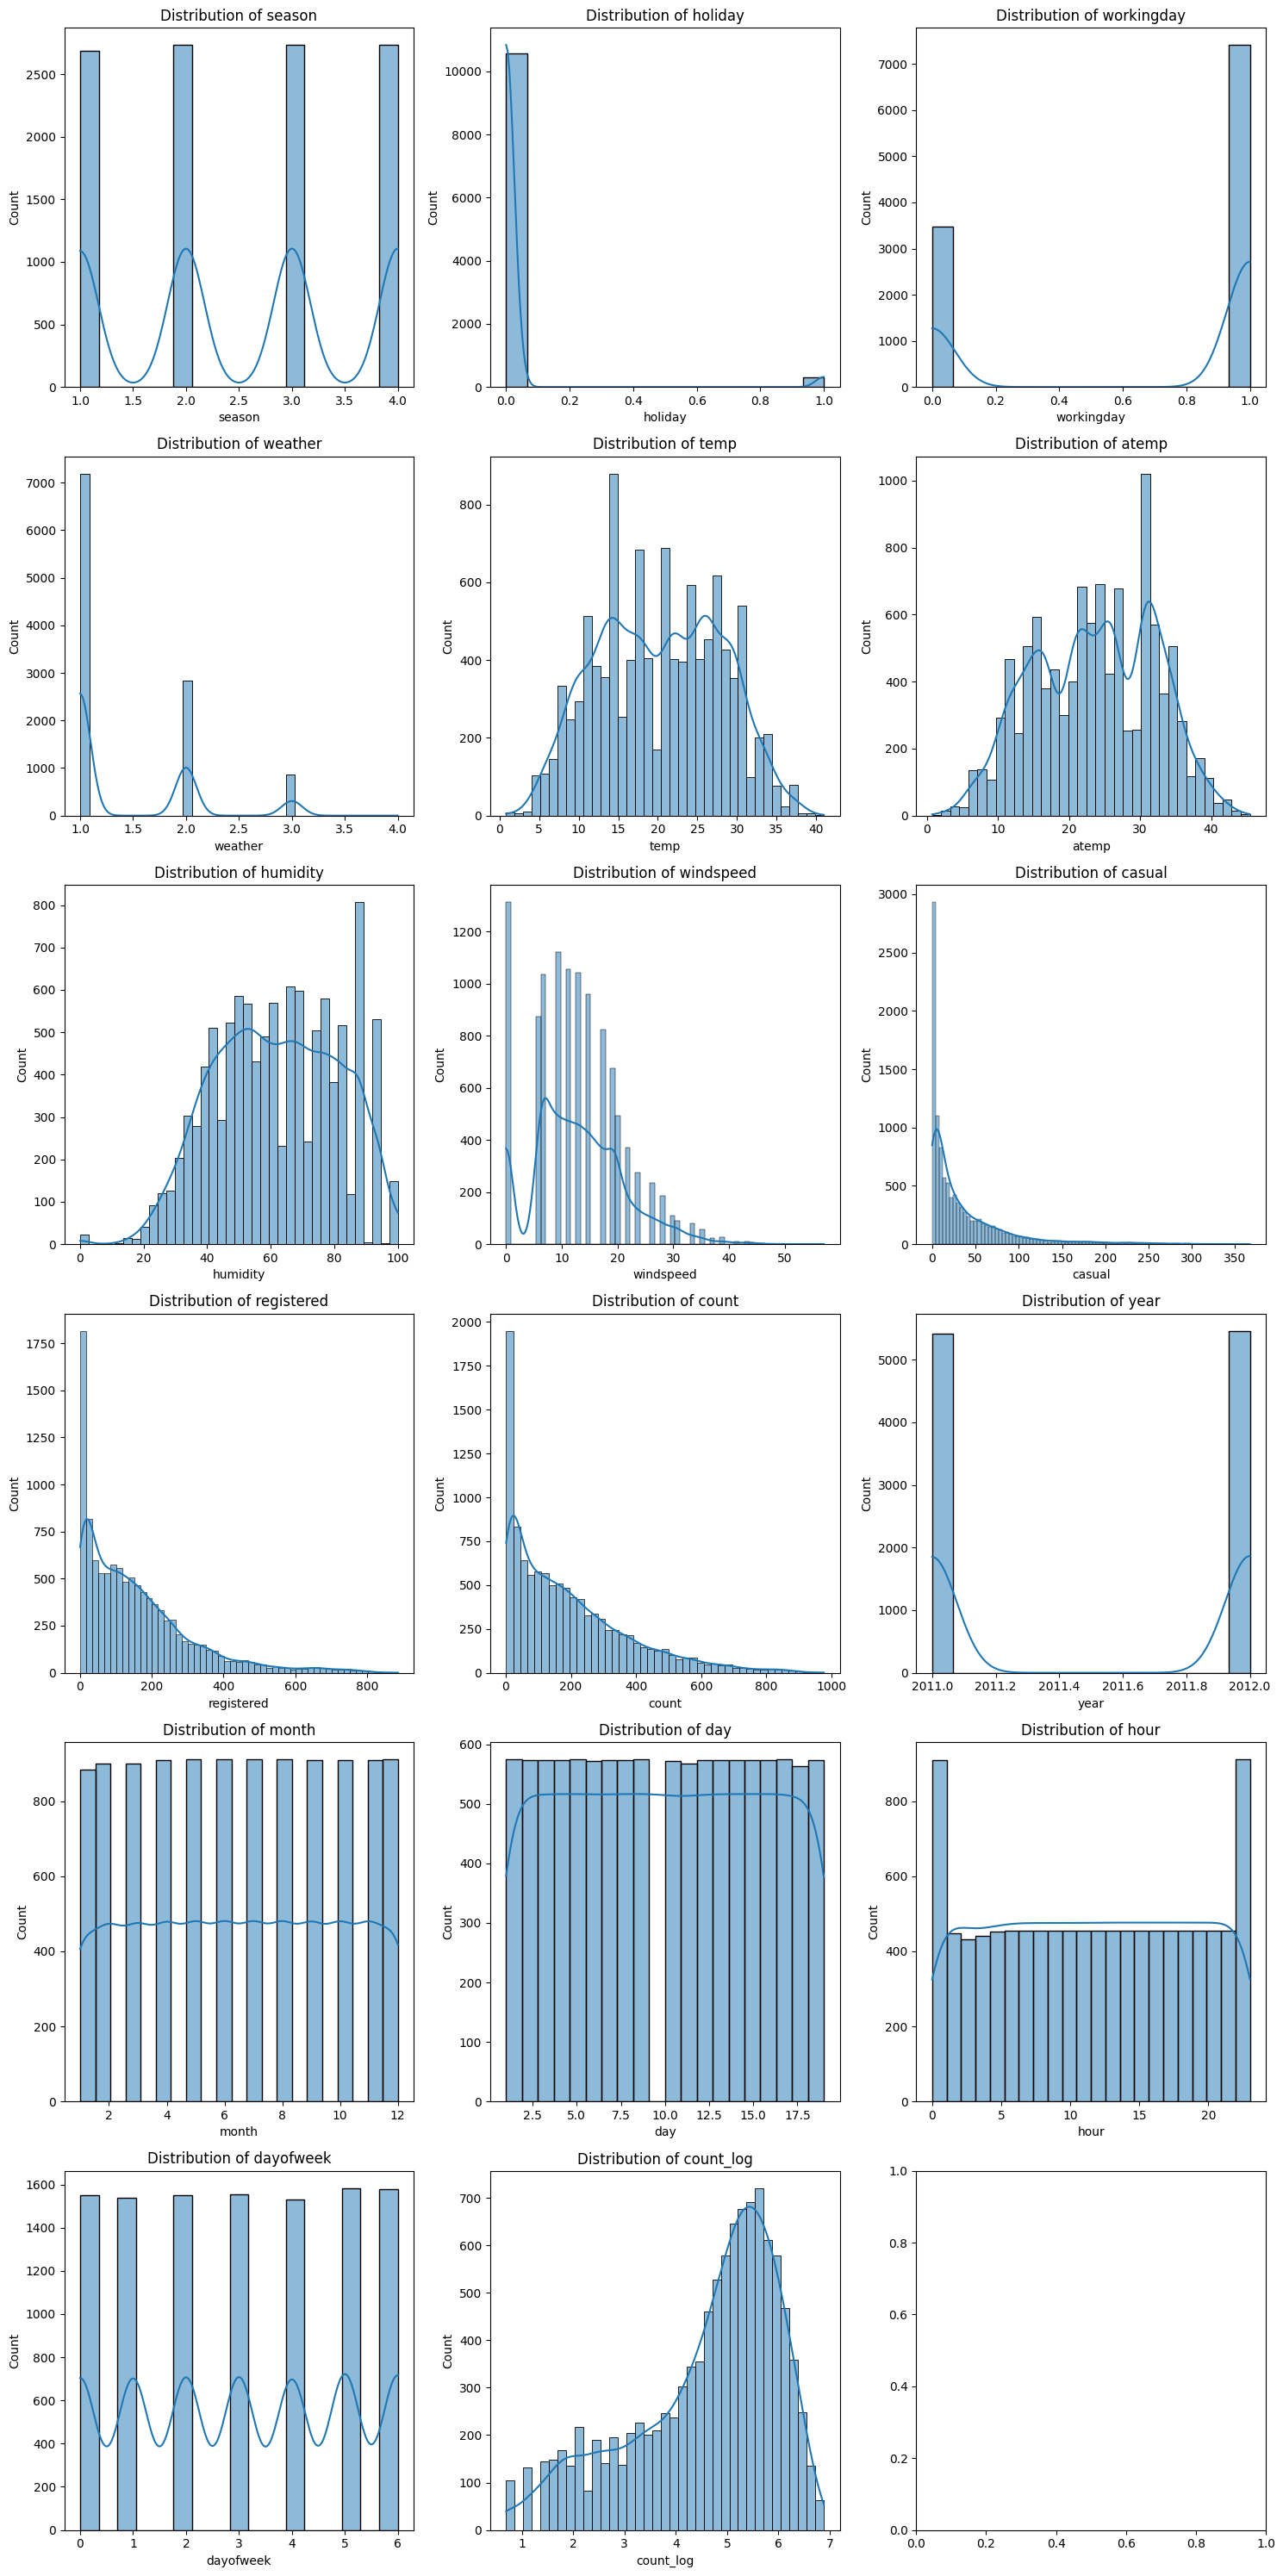

In [ ]:
# Plot the distribution of all numeric columns
num_vars = train.select_dtypes(include=[np.number]).columns.tolist()

n = len(num_vars)
ncols = 3
nrows = n // ncols + (n % ncols != 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

for var, ax in zip(num_vars, axes.ravel()):
    sns.histplot(train[var], kde=True, ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Working Day')]

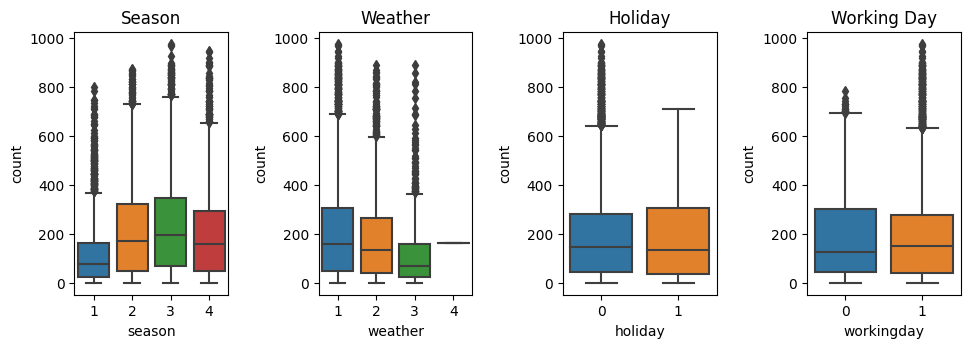

In [ ]:
#Figure 준비
figure, axes = plt.subplots(nrows=1, ncols=4) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 3)

# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[2])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[3])

#서브플롯에 제목 달기
axes[0].set(title='Season')
axes[1].set(title='Weather')
axes[2].set(title='Holiday')
axes[3].set(title='Working Day')

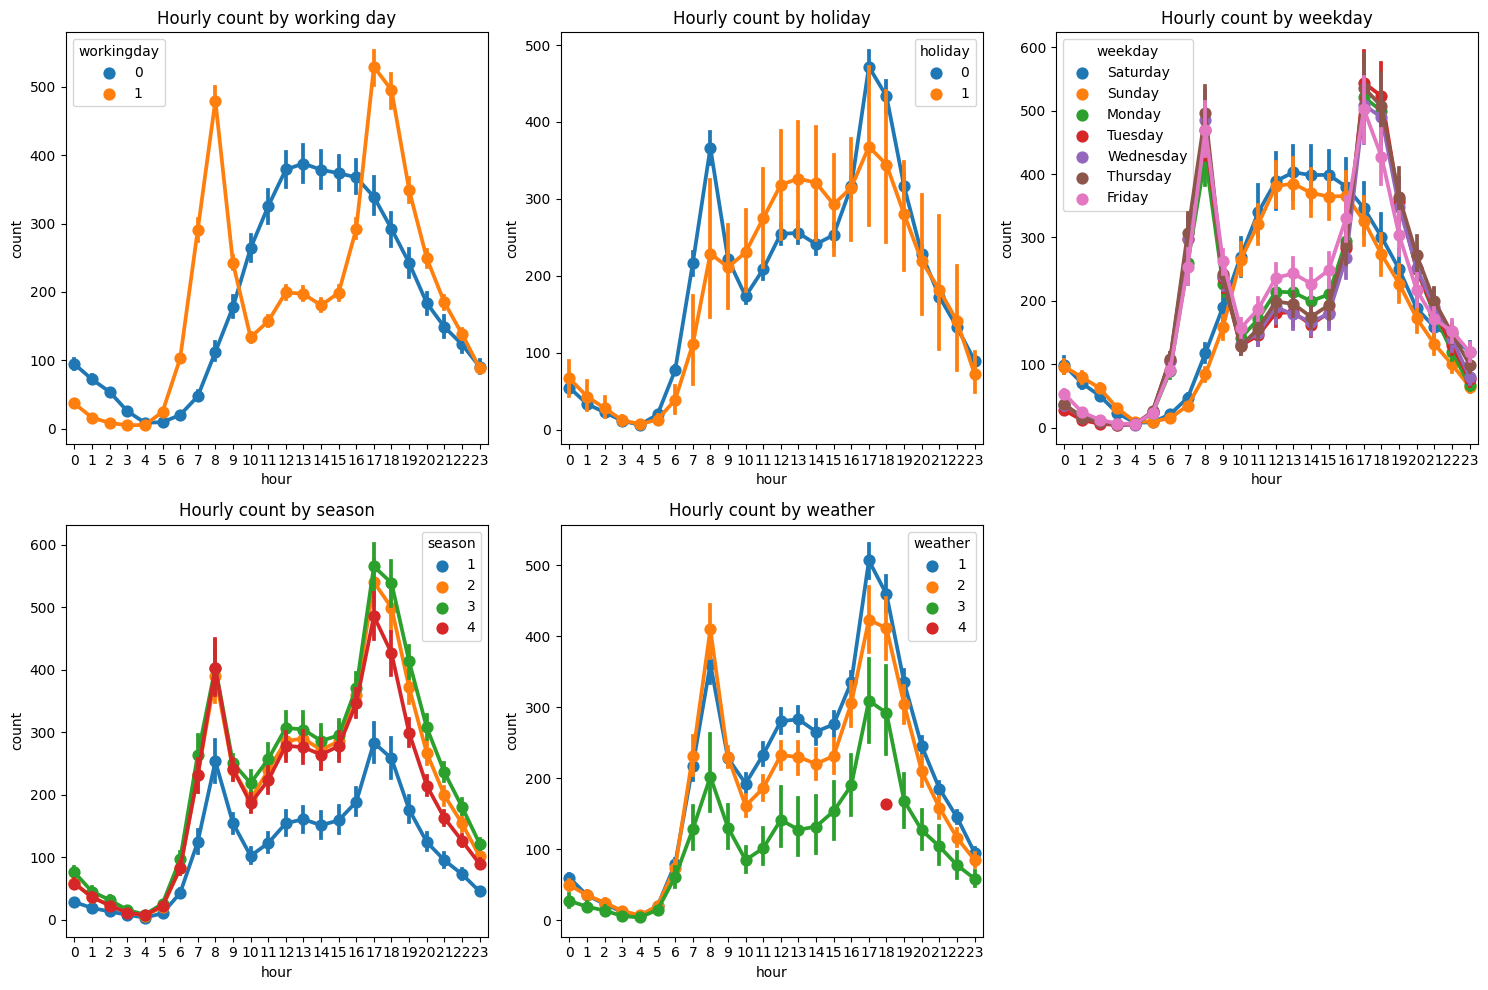

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Create point plots for 'workingday', 'holiday', 'weekday', 'season', 'weather'
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0, 0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[0, 1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[0, 2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[1, 0])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[1, 1])

# Set the titles for the subplots
axes[0, 0].set_title('Hourly count by working day')
axes[0, 1].set_title('Hourly count by holiday')
axes[0, 2].set_title('Hourly count by weekday')
axes[1, 0].set_title('Hourly count by season')
axes[1, 1].set_title('Hourly count by weather')

# Remove the empty subplot
figure.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

<ipython-input-16-c75cbe40d097>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(train.corr(), dtype=np.bool)
<ipython-input-16-c75cbe40d097>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train.corr(), dtype=np.bool)
<ipython-input-16-c75cbe40d097>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence th

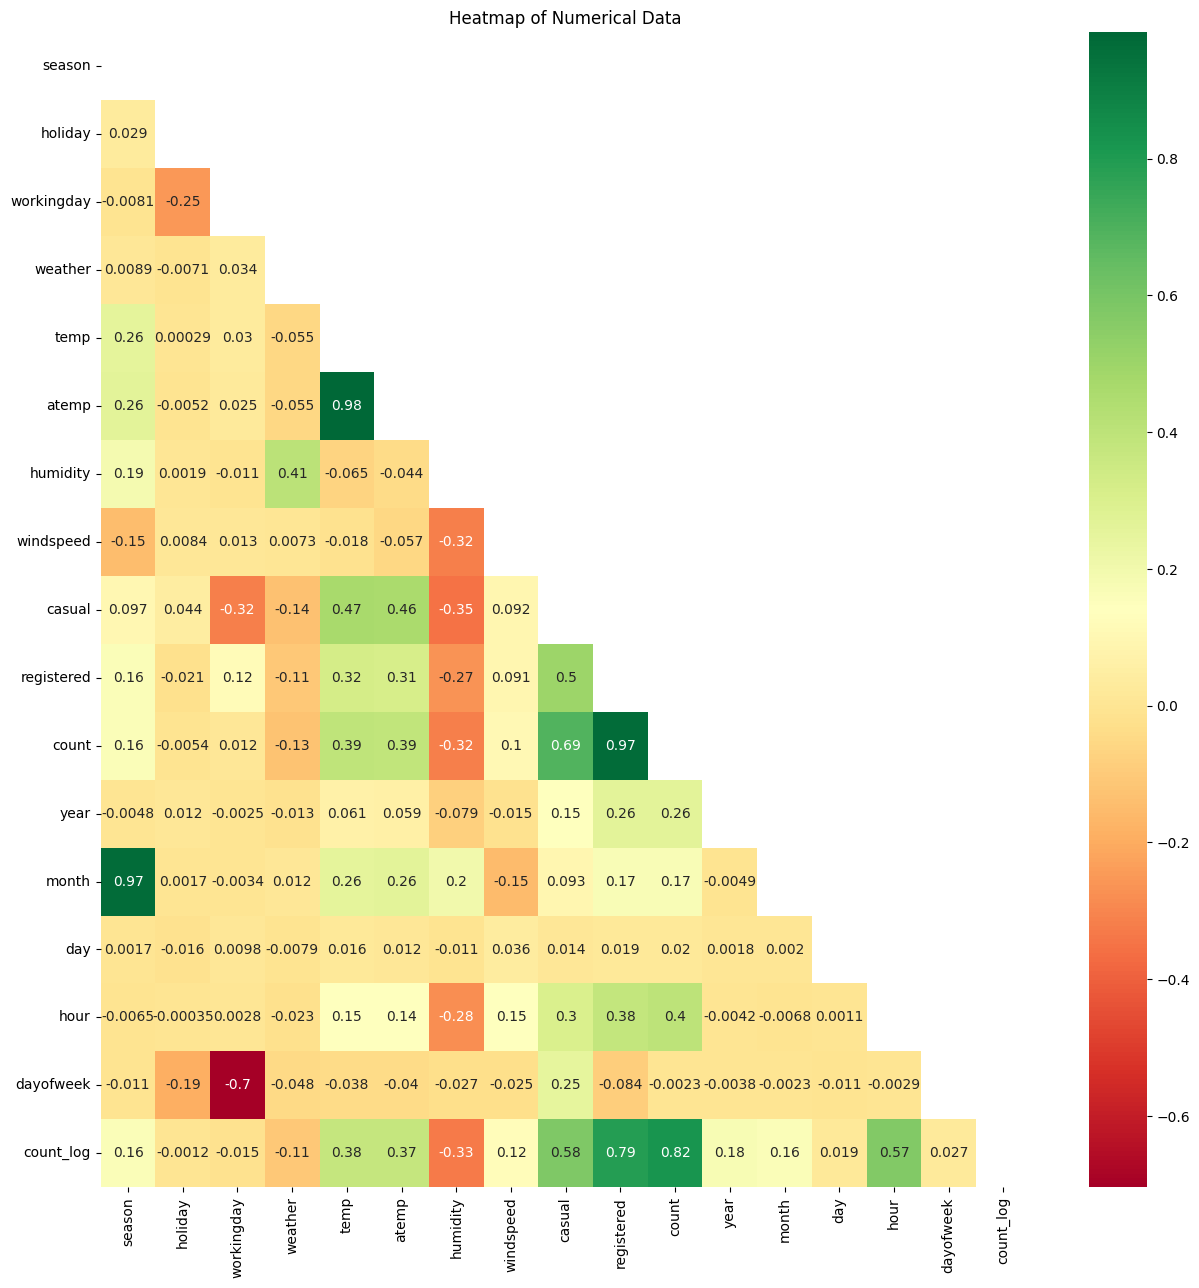

In [ ]:
# 피처 간 상관관계 매트릭스

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax= plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(train.corr(), annot=True, mask=mask, cmap='RdYlGn') # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

## 전처리

In [ ]:
# train = train.drop(train[train['weather'] == 4].index, inplace=True)
# test = test.drop(test[test['weather'] == 4].index, inplace=True)

In [ ]:
train['weather'] = train['weather'].replace(to_replace=4, value=3)
train['weather'].value_counts()

1    7192
2    2834
3     860
Name: weather, dtype: int64

In [ ]:
from sklearn.decomposition import PCA
from scipy.stats import norm

pca=PCA(n_components=1)
pca.fit(train[['temp', 'atemp']])
print(pca.explained_variance_ratio_)

train['new_temp'] = pca.fit_transform(train[['temp','atemp']])
test['new_temp'] = pca.fit_transform(test[['temp','atemp']])

[0.99252735]


## 모델링

In [ ]:
def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [ ]:
(train['holiday'] + train['workingday']).value_counts()

1    7723
0    3163
dtype: int64

In [ ]:
cols1 = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'day', 'hour']

cols2 = ['season', 'holiday', 'workingday', 'weather', 'atemp',
        'humidity', 'windspeed', 'day', 'hour']

cols3 = ['season', 'holiday', 'workingday', 'weather', 'new_temp',
        'humidity', 'windspeed', 'day', 'hour']

cols4 = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'windspeed', 'hour', 'dayofweek']

cols5 = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
        'humidity', 'hour', 'dayofweek']

In [ ]:
X_train = train[cols5]
y_train = train['count']

X_test = test[cols5]

초기
- 1차 : 0.1444
- 2차 : 0.1444

n_estimators=500
- 1차 : 0.1419
- 2차 : 0.1421
- 3차 : 0.1417
- 4차 : 0.1338
- 5차 : 0.1377

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=500)
log_y = np.log(y_train)
rf_model.fit(X_train, log_y)

preds = rf_model.predict(X_train)
print(f'Random Forest의 RMSLE 값: {rmsle(log_y, preds, True):.4f}')

rf_preds = rf_model.predict(X_test)
submission['count'] = np.exp(rf_preds)
submission.to_csv('submission_rf.csv', index=False)

Random Forest의 RMSLE 값: 0.1416


In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(random_state=42, n_estimators=500)
log_y = np.log(y_train)  # 타깃값 로그변환
lgbm_model.fit(X_train, log_y) # 모델 훈련

preds = lgbm_model.predict(X_train)
print (f'LightGBM의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

lgbm_preds = lgbm_model.predict(X_test) # 테스트 데이터로 예측
submission['count'] = np.exp(lgbm_preds)    # 지수변환
# submission.to_csv('submission_lgbm.csv', index=False) # 파일로 저장

LightGBM의 RMSLE 값 : 0.2457


In [ ]:
ensemble = (0.6*rf_preds + 0.4*lgbm_preds)
submission['count'] = np.exp(ensemble)    # 지수변환
submission.to_csv('submission_ensemble.csv', index=False) # 파일로 저장

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(random_state=42, n_estimators=500)
log_y = np.log(y_train)  # 타깃값 로그변환
cat_model.fit(X_train, log_y) # 모델 훈련

preds = cat_model.predict(X_train)
print (f'catboost의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

cat_preds = cat_model.predict(X_test) # 테스트 데이터로 예측
submission['count'] = np.exp(cat_preds)    # 지수변환
submission.to_csv('submission_cat.csv', index=False) # 파일로 저장

Learning rate set to 0.104892
0:	learn: 1.3756401	total: 59.4ms	remaining: 29.6s
1:	learn: 1.2862512	total: 66.1ms	remaining: 16.5s
2:	learn: 1.2025465	total: 68.2ms	remaining: 11.3s
3:	learn: 1.1210598	total: 75.5ms	remaining: 9.36s
4:	learn: 1.0501597	total: 84.1ms	remaining: 8.33s
5:	learn: 0.9932941	total: 86.4ms	remaining: 7.12s
6:	learn: 0.9451260	total: 90.5ms	remaining: 6.38s
7:	learn: 0.8957124	total: 94ms	remaining: 5.78s
8:	learn: 0.8497978	total: 99.3ms	remaining: 5.42s
9:	learn: 0.8154817	total: 105ms	remaining: 5.13s
10:	learn: 0.7880100	total: 108ms	remaining: 4.79s
11:	learn: 0.7616651	total: 110ms	remaining: 4.47s
12:	learn: 0.7374758	total: 113ms	remaining: 4.22s
13:	learn: 0.7156361	total: 115ms	remaining: 4s
14:	learn: 0.7010234	total: 117ms	remaining: 3.79s
15:	learn: 0.6706427	total: 120ms	remaining: 3.63s
16:	learn: 0.6554940	total: 125ms	remaining: 3.56s
17:	learn: 0.6424482	total: 135ms	remaining: 3.61s
18:	learn: 0.6211672	total: 137ms	remaining: 3.47s
19:	lea

In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,14.816685
1,2011-01-20 01:00:00,7.267185
2,2011-01-20 02:00:00,3.927588
3,2011-01-20 03:00:00,2.437277
4,2011-01-20 04:00:00,2.265873


Kaggle Score

[rf + col1] : 0.46033 -> [catboost + col5] : 0.42777

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
log_y = np.log(y_train)  # 타깃값 로그변환
lr_model.fit(X_train, log_y) # 모델 훈련

preds = lr_model.predict(X_train)
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

linearreg_preds = lr_model.predict(X_test) # 테스트 데이터로 예측
submission['count'] = np.exp(linearreg_preds)    # 지수변환
# submission.to_csv('submission_lr.csv', index=False) # 파일로 저장

선형회귀의 RMSLE 값 : 1.0423


<Axes: >

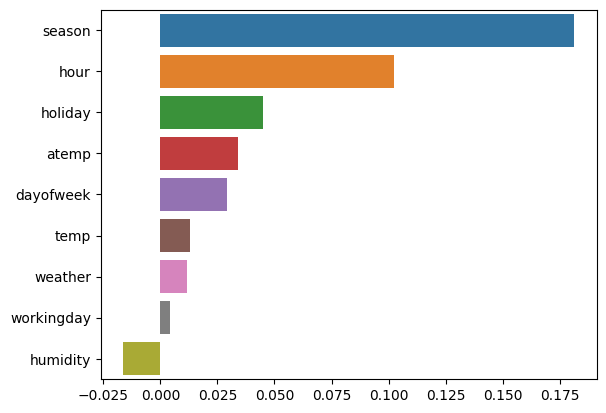

In [ ]:
coef = pd.Series(lr_model.coef_, index = X_train.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
# XGB
from xgboost import XGBRegressor

xgboost_model = XGBRegressor(random_state=123)
xgboost_model.fit(X_train, log_y)

# 테스트 데이터에 대한 예측 수행
predictions = xgboost_model.predict(X_train)
print(f'XGBoost의 RMSLE 값: {rmsle(log_y, predictions, True):.4f}')

# 예측 결과를 CSV 파일로 저장
result = pd.DataFrame({'Prediction': predictions})
result.to_csv('predictions_xgboost.csv', index=False)

XGBoost의 RMSLE 값: 0.2593


In [ ]:
# GBoost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

gboost_model = GradientBoostingRegressor(random_state=123)
gboost_model.fit(X_train, log_y)

# 테스트 데이터에 대한 예측 수행
predictions = gboost_model.predict(X_train)
print(f'GBoost의 RMSLE 값: {rmsle(log_y, predictions, True):.4f}')

# 예측 결과를 CSV 파일로 저장
result = pd.DataFrame({'Prediction': predictions})
# result.to_csv('GBoost.csv', index=False)

GBoost의 RMSLE 값: 0.4213


In [ ]:
# SVR
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train, log_y)

preds = svm_model.predict(X_train)
print(f'SVM의 RMSLE 값: {rmsle(log_y, preds, True):.4f}')

svm_preds = svm_model.predict(X_test)

submission['count'] = np.exp(svm_preds)
submission.to_csv('submission_svm.csv', index=False)

SVM의 RMSLE 값: 0.9028


In [ ]:
# ElasticNet
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet(random_state=123)
elasticnet_model.fit(X_train, log_y)

# 테스트 데이터에 대한 예측 수행
predictions = elasticnet_model.predict(X_train)
print(f'ElasticNet의 RMSLE 값: {rmsle(log_y, predictions, True):.4f}')

# 예측 결과를 CSV 파일로 저장
result = pd.DataFrame({'Prediction': predictions})
result.to_csv('predictions_elasticnet.csv', index=False)

ElasticNet의 RMSLE 값: 1.0606


In [ ]:
# Lasso 모델
from sklearn.linear_model import Lasso

lasso_reg_model = Lasso(random_state=123)
log_y = np.log(y_train)  # 로그로
lasso_reg_model.fit(X_train, log_y)

preds = lasso_reg_model.predict(X_train)

lasso_preds = lasso_reg_model.predict(X_test) #테스트

submission['count'] = np.exp(lasso_preds)  # 지수변환
print(f'라쏘 회귀의 RMSLE 값: {rmsle(log_y, preds, True):.4f}')
# submission.to_csv('lasso.csv', index=False)

라쏘 회귀의 RMSLE 값: 1.0684


[참고]

https://suy379.tistory.com/133

https://github.com/suy379/Kaggle/tree/main/Bike_sharing_demand

https://www.kaggle.com/code/munmun2004/bike-sharing-demand
